# Period consumer complaint to company

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dtypes = {
    'Product': "category",
    'Sub-product': "category",
    'Issue': "category",
    'Sub-issue':"category",
    'Consumer complaint narrative':str,
    'Company public response': "category",
    'Company':"category",
    'State':"category",
    'Tags':"category",
    'Consumer consent provided?':bool,
    'Submitted via':"category",
    'Company response to consumer':"category",
    'Timely response?':bool,
    'Consumer disputed?':bool,
    'Complaint ID':int
}

In [3]:
# get data
data = pd.read_sql_query("SELECT * FROM 'mortgage complaints'"
                , "sqlite:///../dataPreparation/StaterData.db"
                , parse_dates={'Date received': '%Y-%m-%d %H:%M:%S'
                , 'Date sent to company': '%Y-%m-%d %H:%M:%S'}, dtype=dtypes)

In [4]:
data.head()

,index,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2,2023-03-16,Mortgage,Conventional home mortgage,Trouble during payment process,None,"I closed on my house XX/XX/XXXX, XXXX payment...",None,FIFTH THIRD FINANCIAL CORPORATION,TX,78744,None,True,Web,2023-03-16,Closed with non-monetary relief,True,True,6697855
1,5,2022-08-01,Mortgage,VA mortgage,Applying for a mortgage or refinancing an exis...,None,XXXX and XXXX Mortgage payments were marked as...,Company has responded to the consumer and the ...,Freedom Mortgage Company,FL,33032,Servicemember,True,Web,2022-08-01,Closed with explanation,True,True,5832311
2,6,2018-01-19,Mortgage,Conventional home mortgage,Trouble during payment process,None,"XXXX XXXX XXXX On XX/XX/XXXX, I called 21st mo...",None,21ST MORTGAGE CORP.,FL,320XX,None,True,Web,2018-01-19,Closed with explanation,True,True,2787647
3,9,2023-02-18,Mortgage,FHA mortgage,Trouble during payment process,None,Loancare through XXXX XXXX XXXX' is negligentl...,Company has responded to the consumer and the ...,"LoanCare, LLC",FL,331XX,Servicemember,True,Web,2023-02-18,Closed with explanation,True,True,6589323
4,10,2023-03-01,Mortgage,Other type of mortgage,Struggling to pay mortgage,None,"In XXXX of XXXX, I received a Loan Modificatio...",Company believes complaint caused principally ...,NATIONSTAR MORTGAGE LLC,NY,10512,None,True,Web,2023-03-01,Closed with explanation,True,True,6633594


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104899 entries, 0 to 104898
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   index                         104899 non-null  int64         
 1   Date received                 104899 non-null  datetime64[ns]
 2   Product                       104899 non-null  category      
 3   Sub-product                   104899 non-null  category      
 4   Issue                         104899 non-null  category      
 5   Sub-issue                     104899 non-null  category      
 6   Consumer complaint narrative  104899 non-null  object        
 7   Company public response       104899 non-null  category      
 8   Company                       104899 non-null  category      
 9   State                         104899 non-null  category      
 10  ZIP code                      104899 non-null  object        
 11  Tags         

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,104899.0,1.624050e+05,1.011150e+05,2.0,80854.5,156185.0,230614.5,377702.0
Complaint ID,104899.0,3.396903e+06,1.453836e+06,1290155.0,2211466.0,3144911.0,4294917.0,6993625.0


In [7]:
data.corr()

,index,Consumer consent provided?,Timely response?,Consumer disputed?,Complaint ID
index,1.000000,NaN,-0.249758,0.009928,-0.314324
Consumer consent provided?,NaN,NaN,NaN,NaN,NaN
Timely response?,-0.249758,NaN,1.000000,0.006957,0.577099
Consumer disputed?,0.009928,NaN,0.006957,1.000000,0.005968
Complaint ID,-0.314324,NaN,0.577099,0.005968,1.000000


There is no correlation between the variables in the dataset.
The Complaint ID and index variables are not relevant for the analysis.

In [8]:
df = data.copy()
df['response_in_days'] = (data['Date sent to company'] - data['Date received']).dt.days
# df['response_in_days'] = df['response_in_days'].astype('category')

In [9]:
df['response_in_days'].describe().transpose()

count    104899.000000
mean          1.678634
std           8.164167
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         608.000000
Name: response_in_days, dtype: float64

In [10]:
# count frequency of 'response_in_days' values with groupby
df['count_response_in_days'] = df.groupby('response_in_days')['response_in_days'].transform('count')

In [11]:
# get values of response_in_days less than 63 (approximately 2 months)
df_response_days = df[df['response_in_days'] < 63].copy()

In [12]:
df_response_days['response_in_days'].value_counts().sort_index()

0     87226
1      3758
2      1968
3      1473
4      1426
      ...  
58        2
59       14
60       14
61       10
62       11
Name: response_in_days, Length: 63, dtype: int64

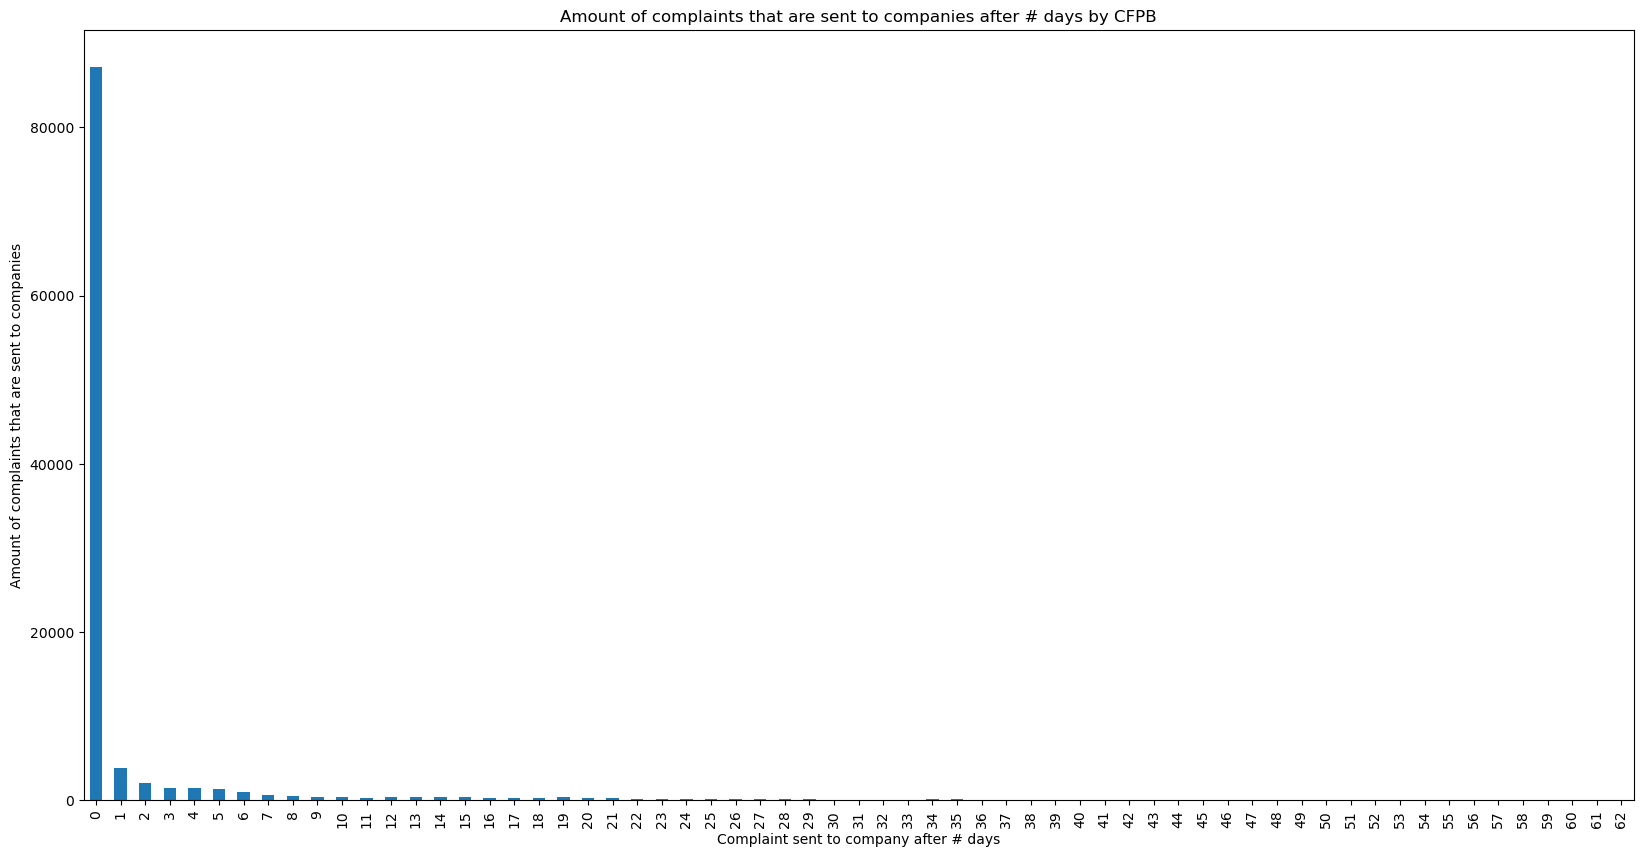

In [13]:
plt.figure(figsize=(20,10))

chart = df_response_days['response_in_days'].value_counts().sort_index().plot(kind='bar', xlabel='Complaint sent to company after # days', ylabel='Amount of complaints that are sent to companies', title="Amount of complaints that are sent to companies after # days by CFPB")
plt.show()

In [14]:
# get values of response_in_days less than 32 (approximately 1 month) and not the day the complaint was sent (0)
df_response_days = df_response_days[(df['response_in_days'] < 46) & (df_response_days['response_in_days'] > 0)]
df_response_days.shape

C:\Users\Cindy\AppData\Local\Temp\ipykernel_17556\108022881.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_response_days = df_response_days[(df['response_in_days'] < 46) & (df_response_days['response_in_days'] > 0)]


(17187, 21)

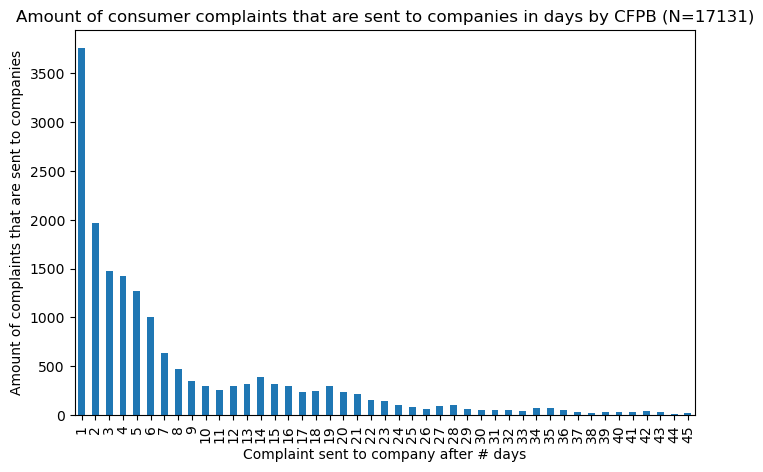

In [15]:
plt.figure(figsize=(8,5))
chart = df_response_days['response_in_days'].value_counts().sort_index().plot(kind='bar', xlabel='Complaint sent to company after # days', ylabel='Amount of complaints that are sent to companies', title="Amount of consumer complaints that are sent to companies in days by CFPB (N=17131)")
plt.show()

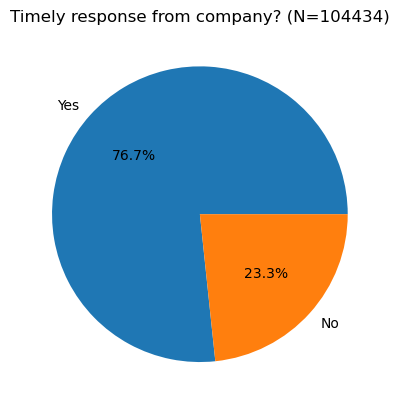

In [16]:
# Timely response pie overview
fig, ax = plt.subplots()
ax.pie(df['Timely response?'].value_counts(), labels=['Yes', 'No'], autopct='%1.1f%%')

plt.title('Timely response from company? (N=104434)')
plt.show()

79.996 complaint (76.6%) of the complaints have received a timely response from the company.